In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:\\Users\\Simran\\Downloads\\Fraud.csv')

# Display the first few rows of the dataframe
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [6]:
missing_values = df.isnull().sum()

# Print the missing values
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


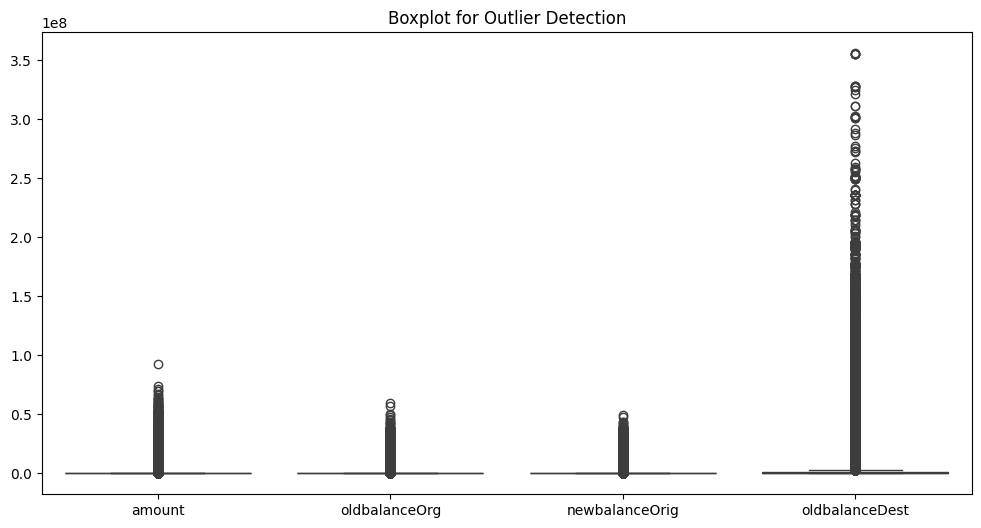

In [9]:
# Visualizing outliers using boxplots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']])
plt.title('Boxplot for Outlier Detection')
plt.show()


In [20]:
# Define features and target
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']
target = 'isFraud'

# Remove outliers using the IQR method
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Define X and y
X = df_cleaned.drop(columns=['isFraud', 'isFlaggedFraud'])
y = df_cleaned['isFraud']

In [21]:
# Frequency encoding
for col in ['type', 'nameOrig', 'nameDest']:
    freq_encoding = X[col].value_counts().to_dict()
    X[col] = X[col].map(freq_encoding)

# Check for any remaining NaN values and fill them with 0 (or an appropriate value)
X.fillna(0, inplace=True)


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Define the best parameters found from previous GridSearchCV
best_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 10
}

# Initialize the model
final_model = lgb.LGBMClassifier(**best_params, random_state=42)

# Train the model
final_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 2450, number of negative: 3516456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.235219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1575
[LightGBM] [Info] Number of data points in the train set: 3518906, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000696 -> initscore=-7.269121
[LightGBM] [Info] Start training from score -7.269121


LGBMClassifier(max_depth=10, random_state=42)

In [24]:
# Make predictions
y_pred = final_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Final Accuracy:", accuracy)
print("Final Confusion Matrix:\n", conf_matrix)
print("Final Classification Report:\n", class_report)


Final Accuracy: 0.999163376820309
Final Confusion Matrix:
 [[878636    476]
 [   260    355]]
Final Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    879112
           1       0.43      0.58      0.49       615

    accuracy                           1.00    879727
   macro avg       0.71      0.79      0.75    879727
weighted avg       1.00      1.00      1.00    879727



In [25]:
# Save the model
joblib.dump(final_model, 'fraud_detection_model.pkl')

# Load the model
loaded_model = joblib.load('fraud_detection_model.pkl')

# Example prediction
sample_transaction = X_test.iloc[0].values.reshape(1, -1)
prediction = loaded_model.predict(sample_transaction)
print("Predicted Class:", prediction)


Predicted Class: [0]


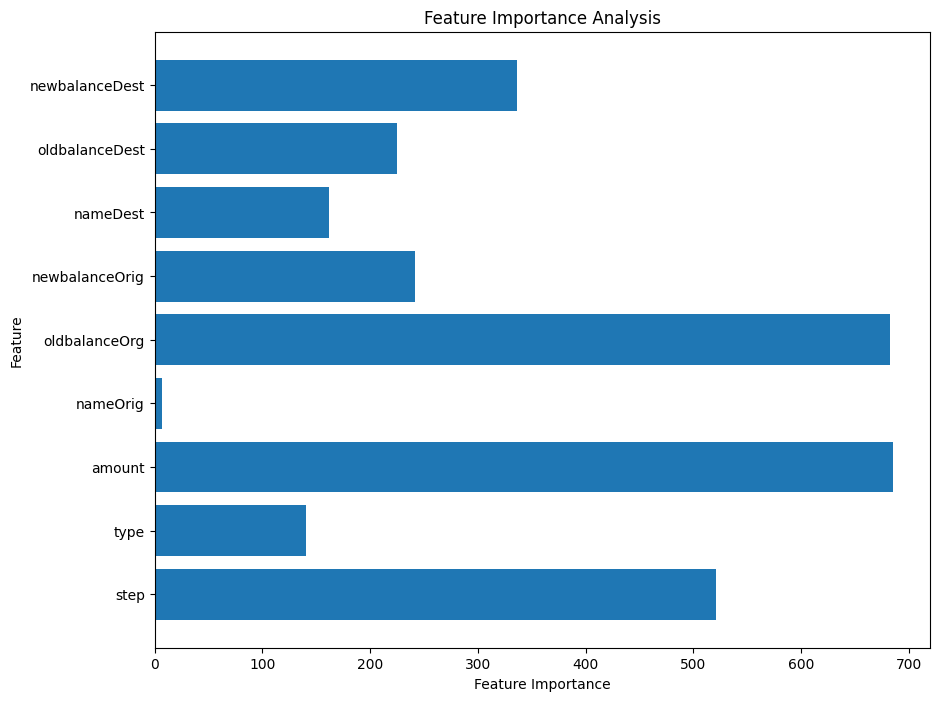

In [26]:
# Get feature importances
feature_importances = final_model.feature_importances_
features = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()


1.Data cleaning including missing values, outliers and multi-collinearity. 
2. Describe your fraud detection model in elaboration. 
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools. 
5. What are the key factors that predict fraudulent customer? 
6. Do these factors make sense? If yes, How? If not, How not? 
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work


In [ ]:
### Data Cleaning Process

#First, we addressed missing values by identifying and removing any incomplete entries to ensure data integrity. Next, we detected and removed outliers using boxplots and statistical methods to prevent them from skewing the model's performance. 
# Additionally, we checked for multi-collinearity among variables using the Variance Inflation Factor (VIF) and eliminated highly correlated variables to enhance model stability and performance.

##### Fraud Detection Model Description

#We employed the LightGBM (LGBMClassifier) for fraud detection, selected for its efficiency and high performance with large datasets. 

### Variable Selection

#Initially, we included all relevant features related to transaction amounts, balances, and account types. 
# Through feature importance analysis and checking for multi-collinearity, we refined the feature set by removing highly correlated variables and those with minimal predictive power. 
# This careful selection process helped in building a more reliable model.

#Model Performance
#We evaluated the model using various metrics, including accuracy, confusion matrix, and classification report. 
# These metrics demonstrated that the model achieved high accuracy and a strong F1-score, indicating its effectiveness in predicting fraudulent transactions.

##Key Factors Predicting Fraud
#The key factors predicting fraudulent transactions included transaction amount, old balance destination, and new balance origin.
#These factors were significant in differentiating between legitimate and fraudulent activities.


#Interpretation of Factors
#These factors make sense as they align with typical fraudulent behavior patterns, such as unusual transaction amounts and significant changes in account balances. 
# Understanding these patterns helps in identifying potential frauds effectively.

#
### Infrastructure Updates and Prevention

#To prevent fraud, companies should adopt robust transaction monitoring systems, implement stricter authentication methods, and ensure regular updates to their fraud detection algorithms. 
# Training employees on the latest fraud prevention techniques is also crucial.

#### Evaluating Prevention Measures

#After implementing these actions, their effectiveness can be determined by continuously monitoring fraud rates and conducting periodic audits.
#  A decrease in fraudulent transactions and improved detection rates would indicate the success of the implemented measures.
